My goal for this notebook is to showcase two different approaches to predicting attrition responses based on a pre-generated dataset developed by IBM. The dataset specifically has a column denoting responses to whether an employee feels they are attritioned. The dataset then has a corresponding number of other categories to measure other data. 

The classification models that will be utilized are the Neural Network classifier implemented by the Multi Layer Perceptron algorithm and the other model will be the Random Forest classifier. Both models are implemented using the by scikit-learn libraries. All categories other than the Attrition category will be used as independent variables to help train the models to accurately predict the dependent variable.    

Importing Libraries

Multiple packages and libraries will be utilized to help process the data, create the model, and display the results in several visualizations. The main modeling library is scikit-learn which is the sklearn package that will be utilized to preprocess the data and to create/train/test the model. 

In [46]:
# HR Employee Attrition Predictor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import graphviz
import seaborn as sns
import sklearn.metrics as metrics
import plotly.graph_objs as go

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize
from sklearn.compose import ColumnTransformer, make_column_transformer
from matplotlib.colors import ListedColormap
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

Graphing ROC Curve

Function that graphs the ROC Curve based on the y test values vs the model predicted y test values. The ROC curve or the AUC ROC Curve (Area under the Curve Receiver Operating Characteristics) evaluates the classification models' performance. It explains how accurately the model is able to predict the various classification classes. 

Source:
- https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

In [47]:
def graphROCCurve(y_test, y_pred):    
    fpr = {}
    tpr = {}
    roc_auc = {}
    
    # Compute micro-average ROC curve and ROC area
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred, pos_label="Yes")
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

Graphing important features for Random Forest Classifier

This method deals with graphing the output of calling the random forest classifier's features importance attribute. The attribute details what features within the set of independent variables that were provided made an impact in the model's ability to classify the class.

Source:
- https://towardsdatascience.com/running-random-forests-inspect-the-feature-importances-with-this-code-2b00dd72b92e

In [48]:
def graphFeaturesImportant(rf_classifier, features):
    trace = go.Scatter(
        y = features, 
        x = dataset.columns.values, mode = "markers",
        marker = dict(
            sizemode = "diameter", sizeref=1, size=13, 
            color=features, colorscale="Portland",
            showscale=True
        ),
        text = dataset.columns.values
    )
    data = [trace]

    layout = go.Layout(
        autosize = True,
        title = "Random Forest Feature Importance",
        hovermode = "closest",
        xaxis = dict(
            ticklen=5, showgrid=True, zeroline=True, showline=True
        ),
        yaxis = dict(
            title="Feature Importance", showgrid=True, zeroline=True,
            ticklen=5, gridwidth=2
        ),
        showlegend=False
    )
    
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

Defining the Neural Network Model

The Multi-layer Perceptron algorithm is a supervised learning algorithm that follows the concept of a neural network. In a neural network a list of feature variables are passed in via the input layer to calculate weights that will allow it to be aggregated to satisfy the activation function and ultimately be sent out via the output layer. 

In between are varying layers of hidden layers that are utilized to learn and adjust the weights to better fit the values to the expected output. Here in this app I am creating a multi-layer perceptron with 13 nodes in the hidden layer and I am using the Stochastic gradient-based optimizer to optimize the neural network as it backpropagates to better scale and fit the data.  

Source:
- https://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [49]:
# developing the Multi Layer Perceptron Neural Network
def creatingNeuralNetworkPredictor(X_train, y_train, X_test, y_test, preprocess):
    print("\nNeural Network Classifier Section")
    print("---------------------------------")
    
    # initialize the Multi Layer Perceptron Neural Network 
    mlp_classifier = MLPClassifier(solver="adam", alpha=1e-5, max_iter=500,
                               hidden_layer_sizes=(13, 13, 13))
    
    # hook up the preprocess step with the classifier params and create the pipeline
    model = make_pipeline(preprocess, mlp_classifier)
    
    # fitting the Multi Layer Perceptron to the training set
    model.fit(X_train, y_train)
    
    print("Training set Score: ", model.score(X_train, y_train))
    print("Testing set Score: ", model.score(X_test, y_test))    
    
    return model

Defining the Random Forest Classifier

Creating a random forest classifier model along with training and testing it. A random forest classifier leverages a number of decision trees and aggregates their prediction values to find the best value given multiple iterations of sub-sampling the training data. 

It uses averaging to improve the prediction accuracy and to control over-fitting. Several parameters were utilized to configure the random forest classifier:

- n_estimators: Number of trees in the forest.
- n_jobs: The number of jobs to run in parallel for both fit and predict.

Source:
- https://towardsdatascience.com/understanding-random-forest-58381e0602d2

In [50]:
# developing the Random Forest Classifier
def creatingRandomForestPredictor(X_train, y_train, X_test, y_test, preprocess):
    print("\nRandom Forest Classifier Section")
    print("---------------------------------")
    
    # initialize the Multi Layer Perceptron Neural Network 
    random_forest_classifier = RandomForestClassifier(**{'n_jobs': -1,
        'n_estimators': 800
    })
    
    # hook up the preprocess step with the classifier params and create the pipeline
    model = make_pipeline(preprocess, random_forest_classifier)
    
    # fitting Random Forest to the training set
    model.fit(X_train, y_train)
    
    print("Training set Score: ", model.score(X_train, y_train))
    print("Testing set Score: ", model.score(X_test, y_test))    
    
    return model

Importing the fictionally generated data that was retrieved from Kaggle.

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [51]:
# importing the data
dataset = pd.read_csv("./data/employee_attrition.csv")
dataset = dataset.drop(["YearsWithCurrManager"], axis=1)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,3,1,80,0,8,0,1,6,4,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,4,80,1,10,3,3,10,7,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,2,80,0,7,3,3,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,3,80,0,8,3,3,8,7,3
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,3,4,80,1,6,3,3,2,2,2


Setting up preprocess steps using the sklearn feature of Pipelines. Main tasks include the following: 

- Separating the independent variables from the dependent variable of Attrition.  
- Separating numerical columns from columns that have string values. 
- Used OneHotEncoder method and library to encode string values of a category into numeric array like integers that can be used to represent the categorical values in a discrete manner.
- Used SimpleImputer to complete missing or null values within a column. 
- Used StandardScaler to standardize the features by removing mean and scaling to unit variance. Often times when features don't look more like each other, it can throw off the estimators. 

Source:
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
- https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [52]:
# using ColumnTransformer only approach
transformed_data = dataset.loc[:, dataset.columns != "Attrition"]
X = transformed_data.values
y = dataset.Attrition.values

numerical_features = transformed_data.dtypes == "int64"
categorical_features = ~numerical_features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

preprocess = make_column_transformer(
    (OneHotEncoder(), categorical_features),
    (make_pipeline(SimpleImputer(), StandardScaler()), numerical_features)
)

Provided initial analysis of the data including column names, any null values within the data, and total responses per Attrition values.

In [53]:
# outputting data summary
print("Summary Info About the Dataset")
print("Does category contain null values?")
print(dataset.isnull().any(), "\n")
print("Said Yes to Attrition: ", y[(y == "Yes")].size)
print("Said No to Attrition:  ", y[(y == "No")].size)
print("Total responses:       ", y.size)

Summary Info About the Dataset
Does category contain null values?
Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel

Training and Testing the Neural Network Model

In [54]:
nn_model = creatingNeuralNetworkPredictor(X_train, y_train, X_test, y_test, preprocess)


Neural Network Classifier Section
---------------------------------
Training set Score:  1.0
Testing set Score:  0.8571428571428571


Analyzing the Model - Accuracy, Classification Report, ROC Curve, Confusion Matrix, and Features Importance

Some notable measurements include the following:
- Accuracy score of the prediction represented in a percentage value. 
- Classification Report 
    - Metrics
        - Precision: Ratio that dictates the ability of the classifier not to label as positive if a sample is negative. 
        - Recall: Ratio that dictates the ability of the classifier to find all positive samples.
        - F1-Score or F-beta score is the weighted harmonic of the precision and recall.
        - Support is the number of occurrences of each class. 
    - Labels - other than the values of each class in the dependent variable
        - Macro Average: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
        - Weighted Average: Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.
        - Zero One Loss: Measurement that measures the entire set of labels to make sure it is correctly predicted, otherwise the loss for the sample will be one. The best performance is therefore a 0.
        - Log Loss: Calculates for a list of actual of valid values, how much of a probability in the accuracy of the prediction was for each of the labels.   
- ROC Curve
    - As discussed before the ROC curve or the AUC ROC Curve (Area under the Curve Receiver Operating Characteristics) evaluates the classification models' performance. 
    - It explains how accurately the model is able to predict the various classification classes.
    - The macro average is used since there are only two classes for classification (Yes or No). It will treat each metric independently and take an average resulting in the classes having equal weight.
- Confusion Matrix
    - Chart and calculations that measures the number of true positives, true negatives, false positives, and false negatives between the prediction and test values.

Source:
- https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62        
- https://markhneedham.com/blog/2016/09/14/scikit-learn-first-steps-with-log_loss/        
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.zero_one_loss.html

Analyzing the Neural Network Model - Accuracy
- The overall prediction accuracy of the model is at 85.7%. 
- However, a break down of the classification labels shows that the model has a higher accuracy rate with accurately predicting No versus Yes. 

In [55]:
# Predicting the Test set results
nn_y_pred = nn_model.predict(X_test)

# output results
nn_y_pred_prob = nn_model.predict_proba(X_test)[:, 1]

print("Accuracy Score of Prediction : ", metrics.accuracy_score(y_test, nn_y_pred) * 100)
print("\nClassification Report")
print(metrics.classification_report(y_test, nn_y_pred))
print("Zero One Loss: ", metrics.zero_one_loss(y_test, nn_y_pred))
print("Log Loss:      ", metrics.log_loss(y_test, nn_y_pred_prob))

Accuracy Score of Prediction :  85.71428571428571

Classification Report
              precision    recall  f1-score   support

          No       0.91      0.93      0.92       373
         Yes       0.54      0.47      0.50        68

    accuracy                           0.86       441
   macro avg       0.72      0.70      0.71       441
weighted avg       0.85      0.86      0.85       441

Zero One Loss:  0.1428571428571429
Log Loss:       1.2008756767117563


Analyzing the Neural Network Model - ROC Curve
- Visually we can tell that since the ROC curve is nearer to the middle of lining up with the y-axis and the x-axis with a slop of nearly 1 for both that the model scores at a good range in the ROC score. 
- As such we can see that the score is at 0.77. 

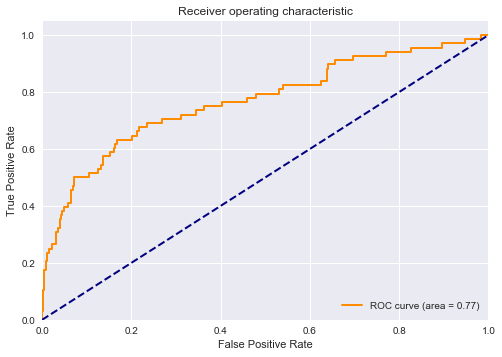

ROC AUC Score:  0.7686879041160699


In [56]:
graphROCCurve(y_test, nn_y_pred_prob)
print("ROC AUC Score: ", metrics.roc_auc_score(y_test, nn_y_pred_prob, average="macro"))

Analyzing the Neural Network Model - Confusion Matrix
- The confusion matrix breaks down the expected responses and how the predictions lined up. 
- We can see that most of the responses were No and we accurately predicted that. While for the Yes responses we fared worse with over half of the responses being predicted as No when they should have been Yes.


Confusion Matrix
Predicted   No  Yes  All
True                    
No         346   27  373
Yes         36   32   68
All        382   59  441


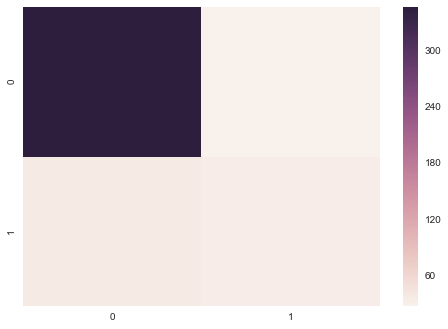

In [57]:
nn_cm = metrics.confusion_matrix(y_test, nn_y_pred)
sns.heatmap(nn_cm)
print("\nConfusion Matrix")
print(pd.crosstab(y_test.ravel(), nn_y_pred.ravel(), rownames=['True'], colnames=['Predicted'], margins=True))
plt.show()

Training and Testing the Random Forest Model

In [58]:
rf_model = creatingRandomForestPredictor(X_train, y_train, X_test, y_test, preprocess)


Random Forest Classifier Section
---------------------------------
Training set Score:  1.0
Testing set Score:  0.8594104308390023


Analyzing the Random Forest Model - Accuracy
- We can see that the Random Forest model had a prediction accuracy of 85.9% compared to that of the neural network at 85.7%. 
- Additionally, for the Yes responses the random forest approach fared better as a whole with that type of response scoring at a rate of 75% precision, but was more dispersed in the other categories. 

In [59]:

# Predicting the Test set results
rf_y_pred = rf_model.predict(X_test)

# output results
rf_y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("Accuracy Score of Prediction : ", metrics.accuracy_score(y_test, rf_y_pred) * 100)
print("\nClassification Report")
print(metrics.classification_report(y_test, rf_y_pred))
print("Zero One Loss: ", metrics.zero_one_loss(y_test, rf_y_pred))
print("Log Loss:      ", metrics.log_loss(y_test, rf_y_pred_prob))

Accuracy Score of Prediction :  85.94104308390023

Classification Report
              precision    recall  f1-score   support

          No       0.86      0.99      0.92       373
         Yes       0.75      0.13      0.23        68

    accuracy                           0.86       441
   macro avg       0.81      0.56      0.57       441
weighted avg       0.85      0.86      0.82       441

Zero One Loss:  0.14058956916099774
Log Loss:       0.343677567528613


Analyzing the Random Forest Model - ROC Curve
- The ROC curve meanwhile showcased the random forest model did a littl better than that of the neural network model. 
- With a score of 0.81 we can see the curve moving closer to that of the main slope line.

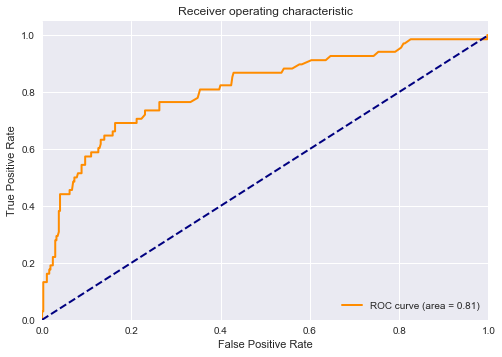

ROC AUC Score:  0.8099668821952375


In [60]:
graphROCCurve(y_test, rf_y_pred_prob)
print("ROC AUC Score: ", metrics.roc_auc_score(y_test, rf_y_pred_prob, average="macro"))

Analyzing the Random Forest Model - Confusion Matrix
- The confusion matrix showcases that the random forest model fared better in the Yes label category as it was able to predict more accurately positive predictions for Yes responses. 
- It did more about the same rate of success for No responses as the neural network model.


Confusion Matrix
Predicted   No  Yes  All
True                    
No         370    3  373
Yes         59    9   68
All        429   12  441


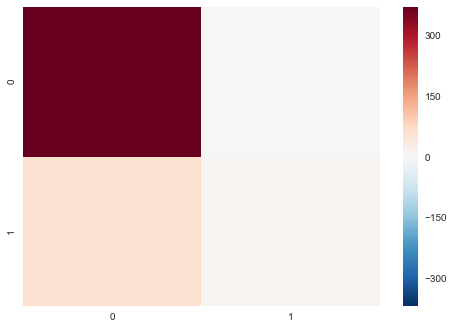

In [61]:
rf_cm = metrics.confusion_matrix(y_test, rf_y_pred)
print("\nConfusion Matrix")
print(pd.crosstab(y_test.ravel(), rf_y_pred.ravel(), rownames=['True'], colnames=['Predicted'], margins=True))
sns.heatmap(rf_cm, center=True)
plt.show()

As demonstrated above, both types of machine learning models can be utilized to accurately predict the attrition rate given the independent variables provided. I, also, found using the Pipelines approach provided by scikit-learn a great way to preprocess/transform the data. It was a more organized way of coordinating what columns needed to be changed without drilling manually into each column. 

Hope you enjoy it as well :)